# Workbook 3

<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:43: SyntaxWarning: invalid escape sequence '\s'
C:\Users\clste\AppData\Local\Temp\ipykernel_444\163056538.py:41: SyntaxWarning: invalid escape sequence '\D'
  axes.set_xlabel('$\Delta x$')
C:\Users\clste\AppData\Local\Temp\ipykernel_444\163056538.py:43: SyntaxWarning: invalid escape sequence '\s'
  axes.set_title(f'Convergence Order for $\sin(x)$')


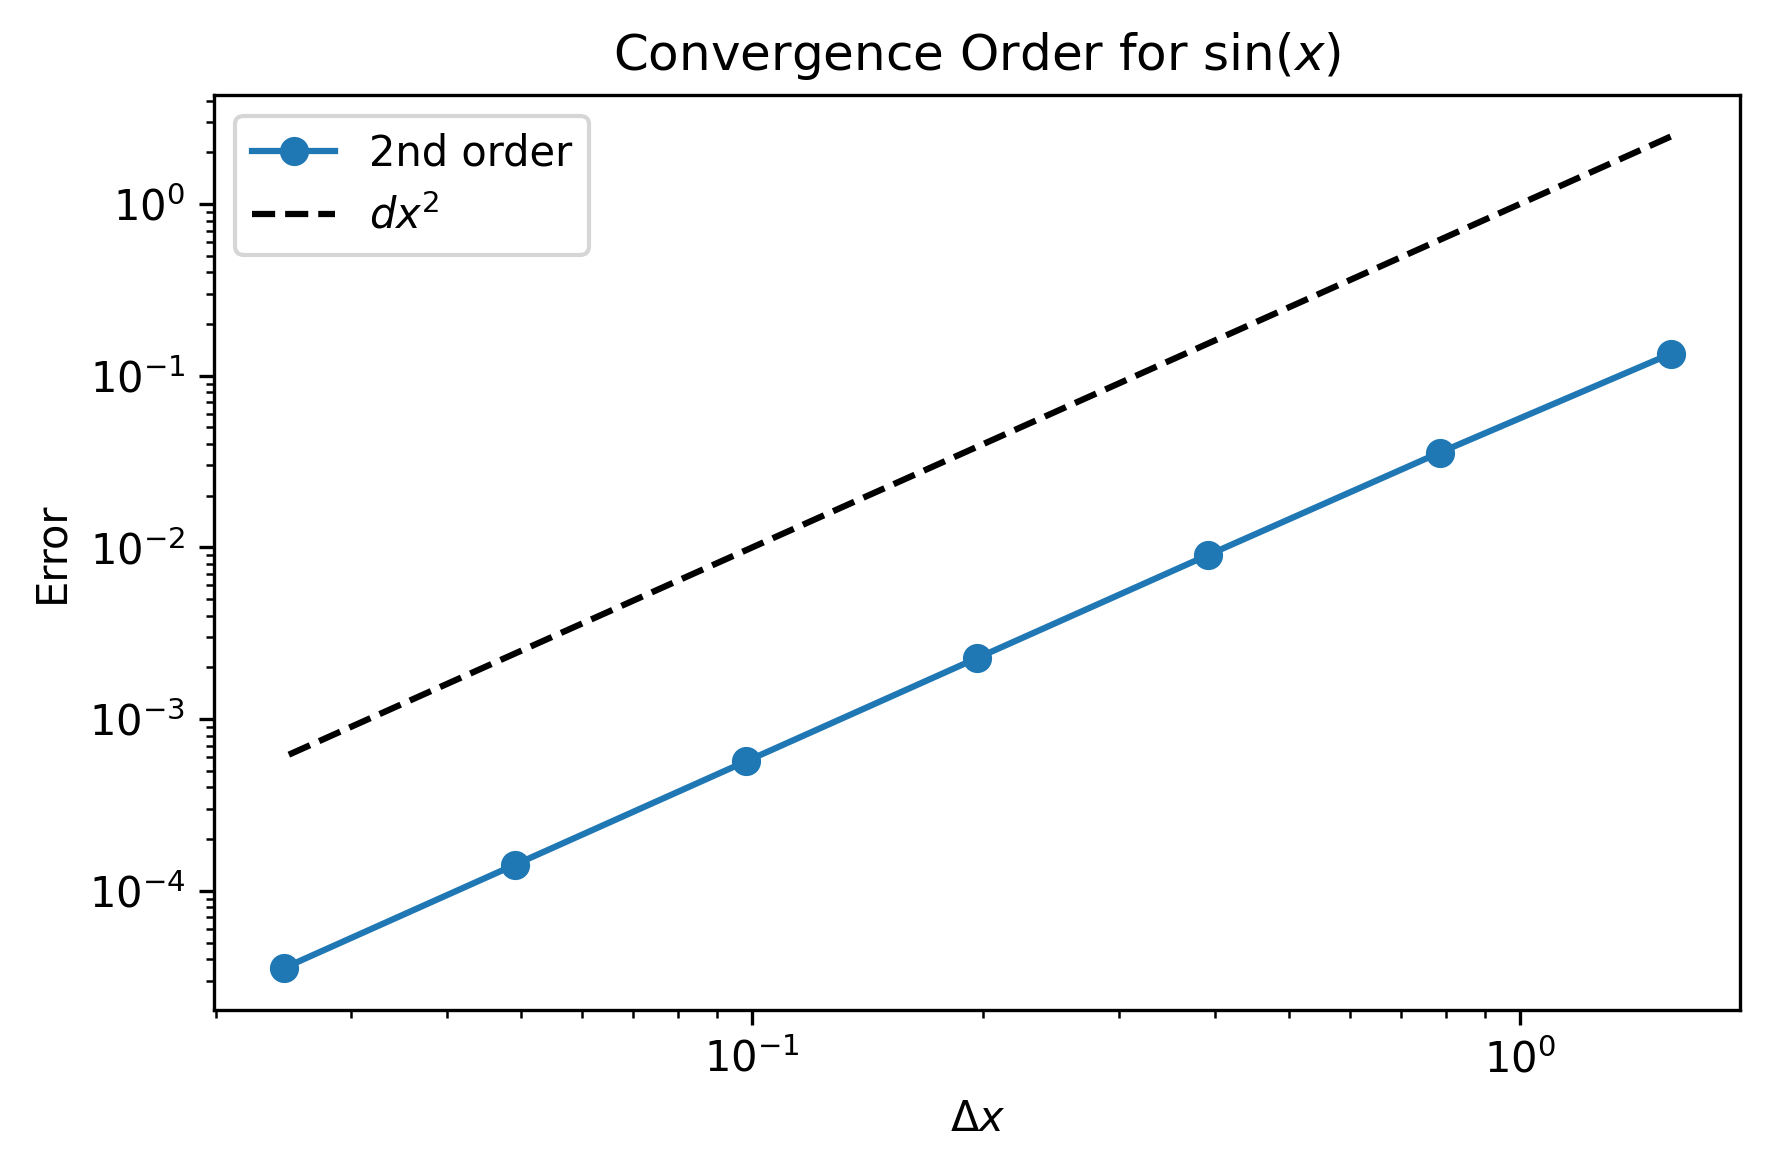

In [7]:
import numpy as np
import matplotlib.pyplot as plt
mp.rcParams['figure.dpi'] = 300

# Set figure layout properties
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
fig.subplots_adjust(wspace=0.05, hspace=0.5, left=0.1, right=0.8, bottom=0.1, top=0.9)

# Loop through Nmodes
def u(x):
    return np.sin(x)

def u_2prime(x):
    return -np.sin(x)
Lx = 2*np.pi
Nxs = np.power(2, np.arange(2, 9))  # Number of grid points
err = np.zeros(Nxs.shape)  # Store error values

for ind, Nx in enumerate(Nxs):
    # Grid with chosen resolution
    x = np.linspace(-Lx / 2, Lx / 2, Nx, endpoint=False)
    Delta_x = x[1] - x[0]

    # Function and its true derivative
    y = u(x)
    yp = u_2prime(x)

    # Numerical second derivative using finite differences
    d2udx2 = (np.roll(y, 1) - 2 * y + np.roll(y, -1)) / (Delta_x**2)

     # Compute error (RMS)
    err[ind] = np.sqrt(np.mean((d2udx2 - yp) ** 2))

# Plot error vs resolution
axes.plot(Lx / Nxs, err, '-o', label='2nd order')
axes.plot(Lx / Nxs, (Lx / Nxs)**2, '--k', label='$dx^2$ ')
axes.set_yscale('log')
axes.set_xscale('log')

# Labels and titles
axes.set_xlabel('$\Delta x$')
axes.set_ylabel('Error')
axes.set_title(f'Convergence Order for $\sin(x)$')
axes.legend()

# Show plot
plt.tight_layout()
plt.show()


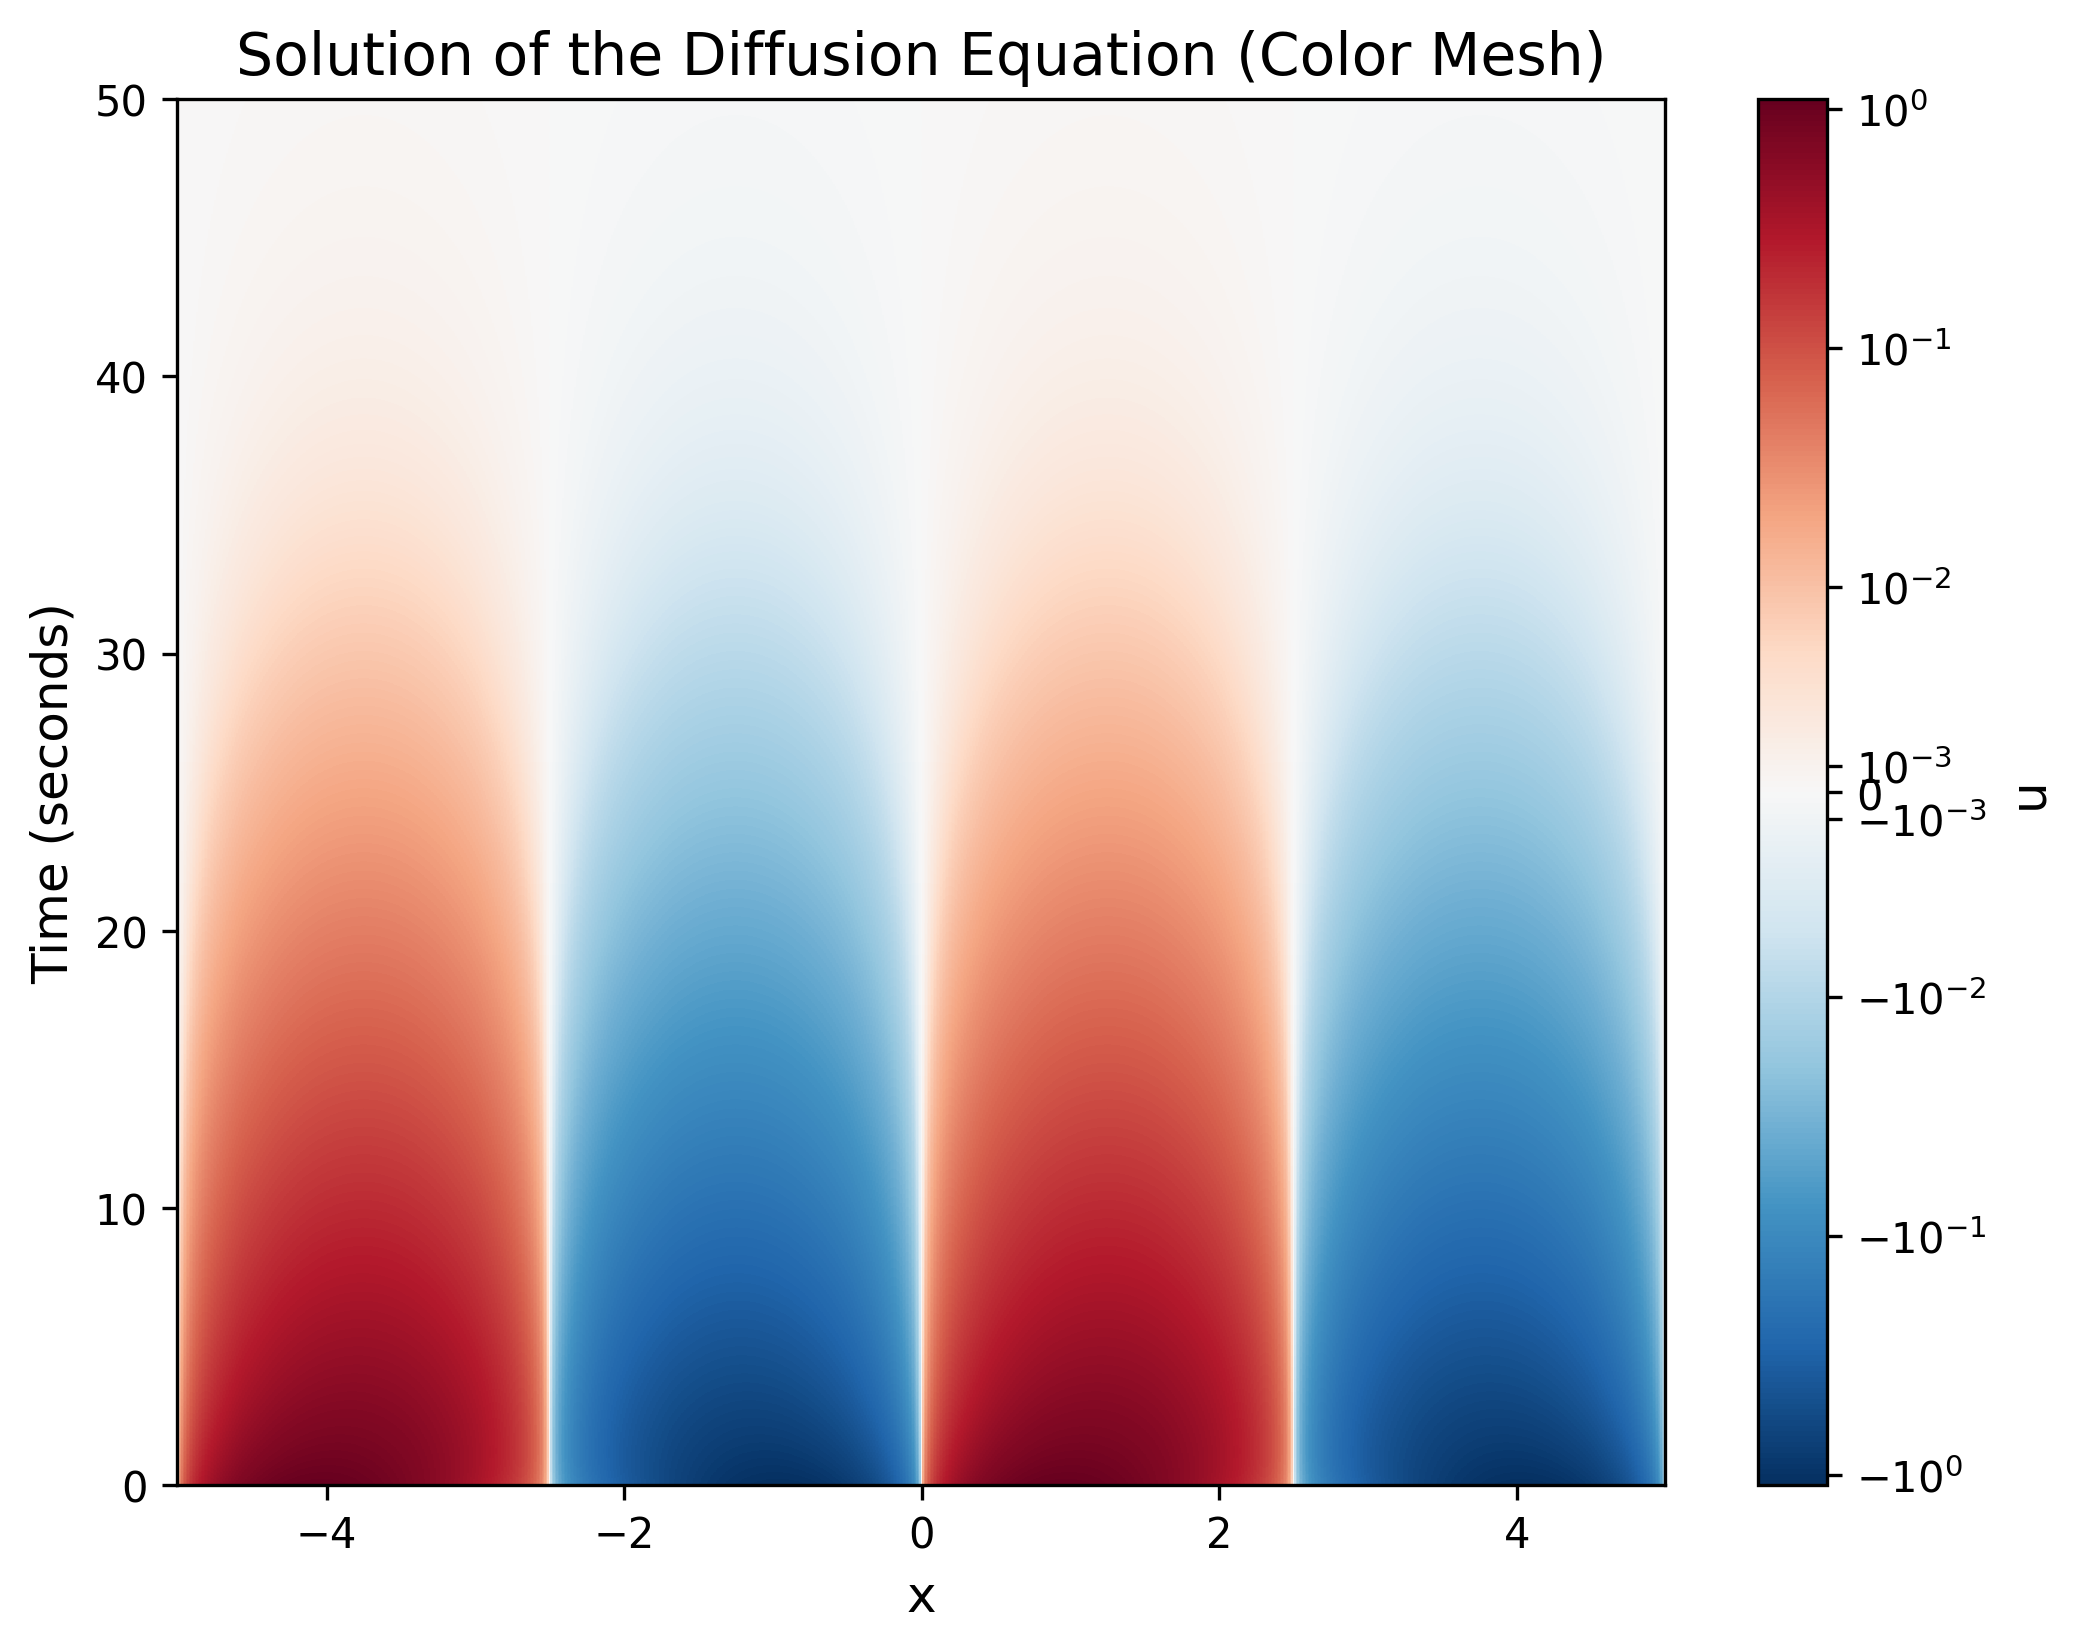

In [6]:
import numpy as np
import matplotlib as mp
import matplotlib.colors
import matplotlib.pyplot as plt
mp.rcParams['figure.dpi'] = 300

# Parameters
Lx = 10         # Domain length
nu = 0.1        # Diffusion coefficient
Nx = 1000        # Number of spatial grid points (adjustable)
T = 50          # Total simulation time
Nt = 100000       # Number of time steps (adjustable)

# Derived quantities
dx = Lx / Nx    # Spatial resolution
dt = T / Nt     # Time step
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)  # Spatial grid
t = np.linspace(0, T, Nt)  # Time array

# Stability check
if dt > (dx**2 / (2 * nu)):
    raise ValueError("Time step size does not satisfy the CFL condition for diffusion!")

# Initial condition
u = np.sin(4 * np.pi * x / Lx) + 0.25 * np.sin(8 * np.pi * x / Lx)

# Solution array to store results at each time step
solution = np.zeros((Nt, Nx))
solution[0, :] = u  # Store initial condition

# Time-stepping loop (Second-order Central Difference Scheme for Diffusion)
u_new = np.copy(u)
for n in range(1, Nt):
    # Update the interior points using the second derivative
    u_new[1:-1] = u[1:-1] + nu * dt / dx**2 * (u[2:] - 2 * u[1:-1] + u[:-2])
    
    # Apply periodic boundary conditions
    u_new[0] = u[0] + nu * dt / dx**2 * (u[1] - 2 * u[0] + u[-1])  # Left boundary
    u_new[-1] = u[-1] + nu * dt / dx**2 * (u[0] - 2 * u[-1] + u[-2])  # Right boundary

    # Store the result for the current time step
    solution[n, :] = u_new
    
    # Update for the next step
    u = np.copy(u_new)

# Visualization using pcolormesh
cv = np.max(np.abs(solution))  # Compute max absolute value for color scaling
plt.figure(figsize=(8, 6))
plt.pcolormesh(x, t, solution, norm=matplotlib.colors.SymLogNorm(linthresh=0.005, linscale=0.5, vmin=-cv, vmax=cv, base=10) ,shading='auto', cmap='RdBu_r')

# Add colorbar and labels
cbar = plt.colorbar()
cbar.ax.set_ylabel('u', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Solution of the Diffusion Equation (Color Mesh)', fontsize=14)
plt.show()


C:\Users\clste\AppData\Local\Temp\ipykernel_444\3700898405.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(u**2, x)  # Or use np.sum(u**2) * dx


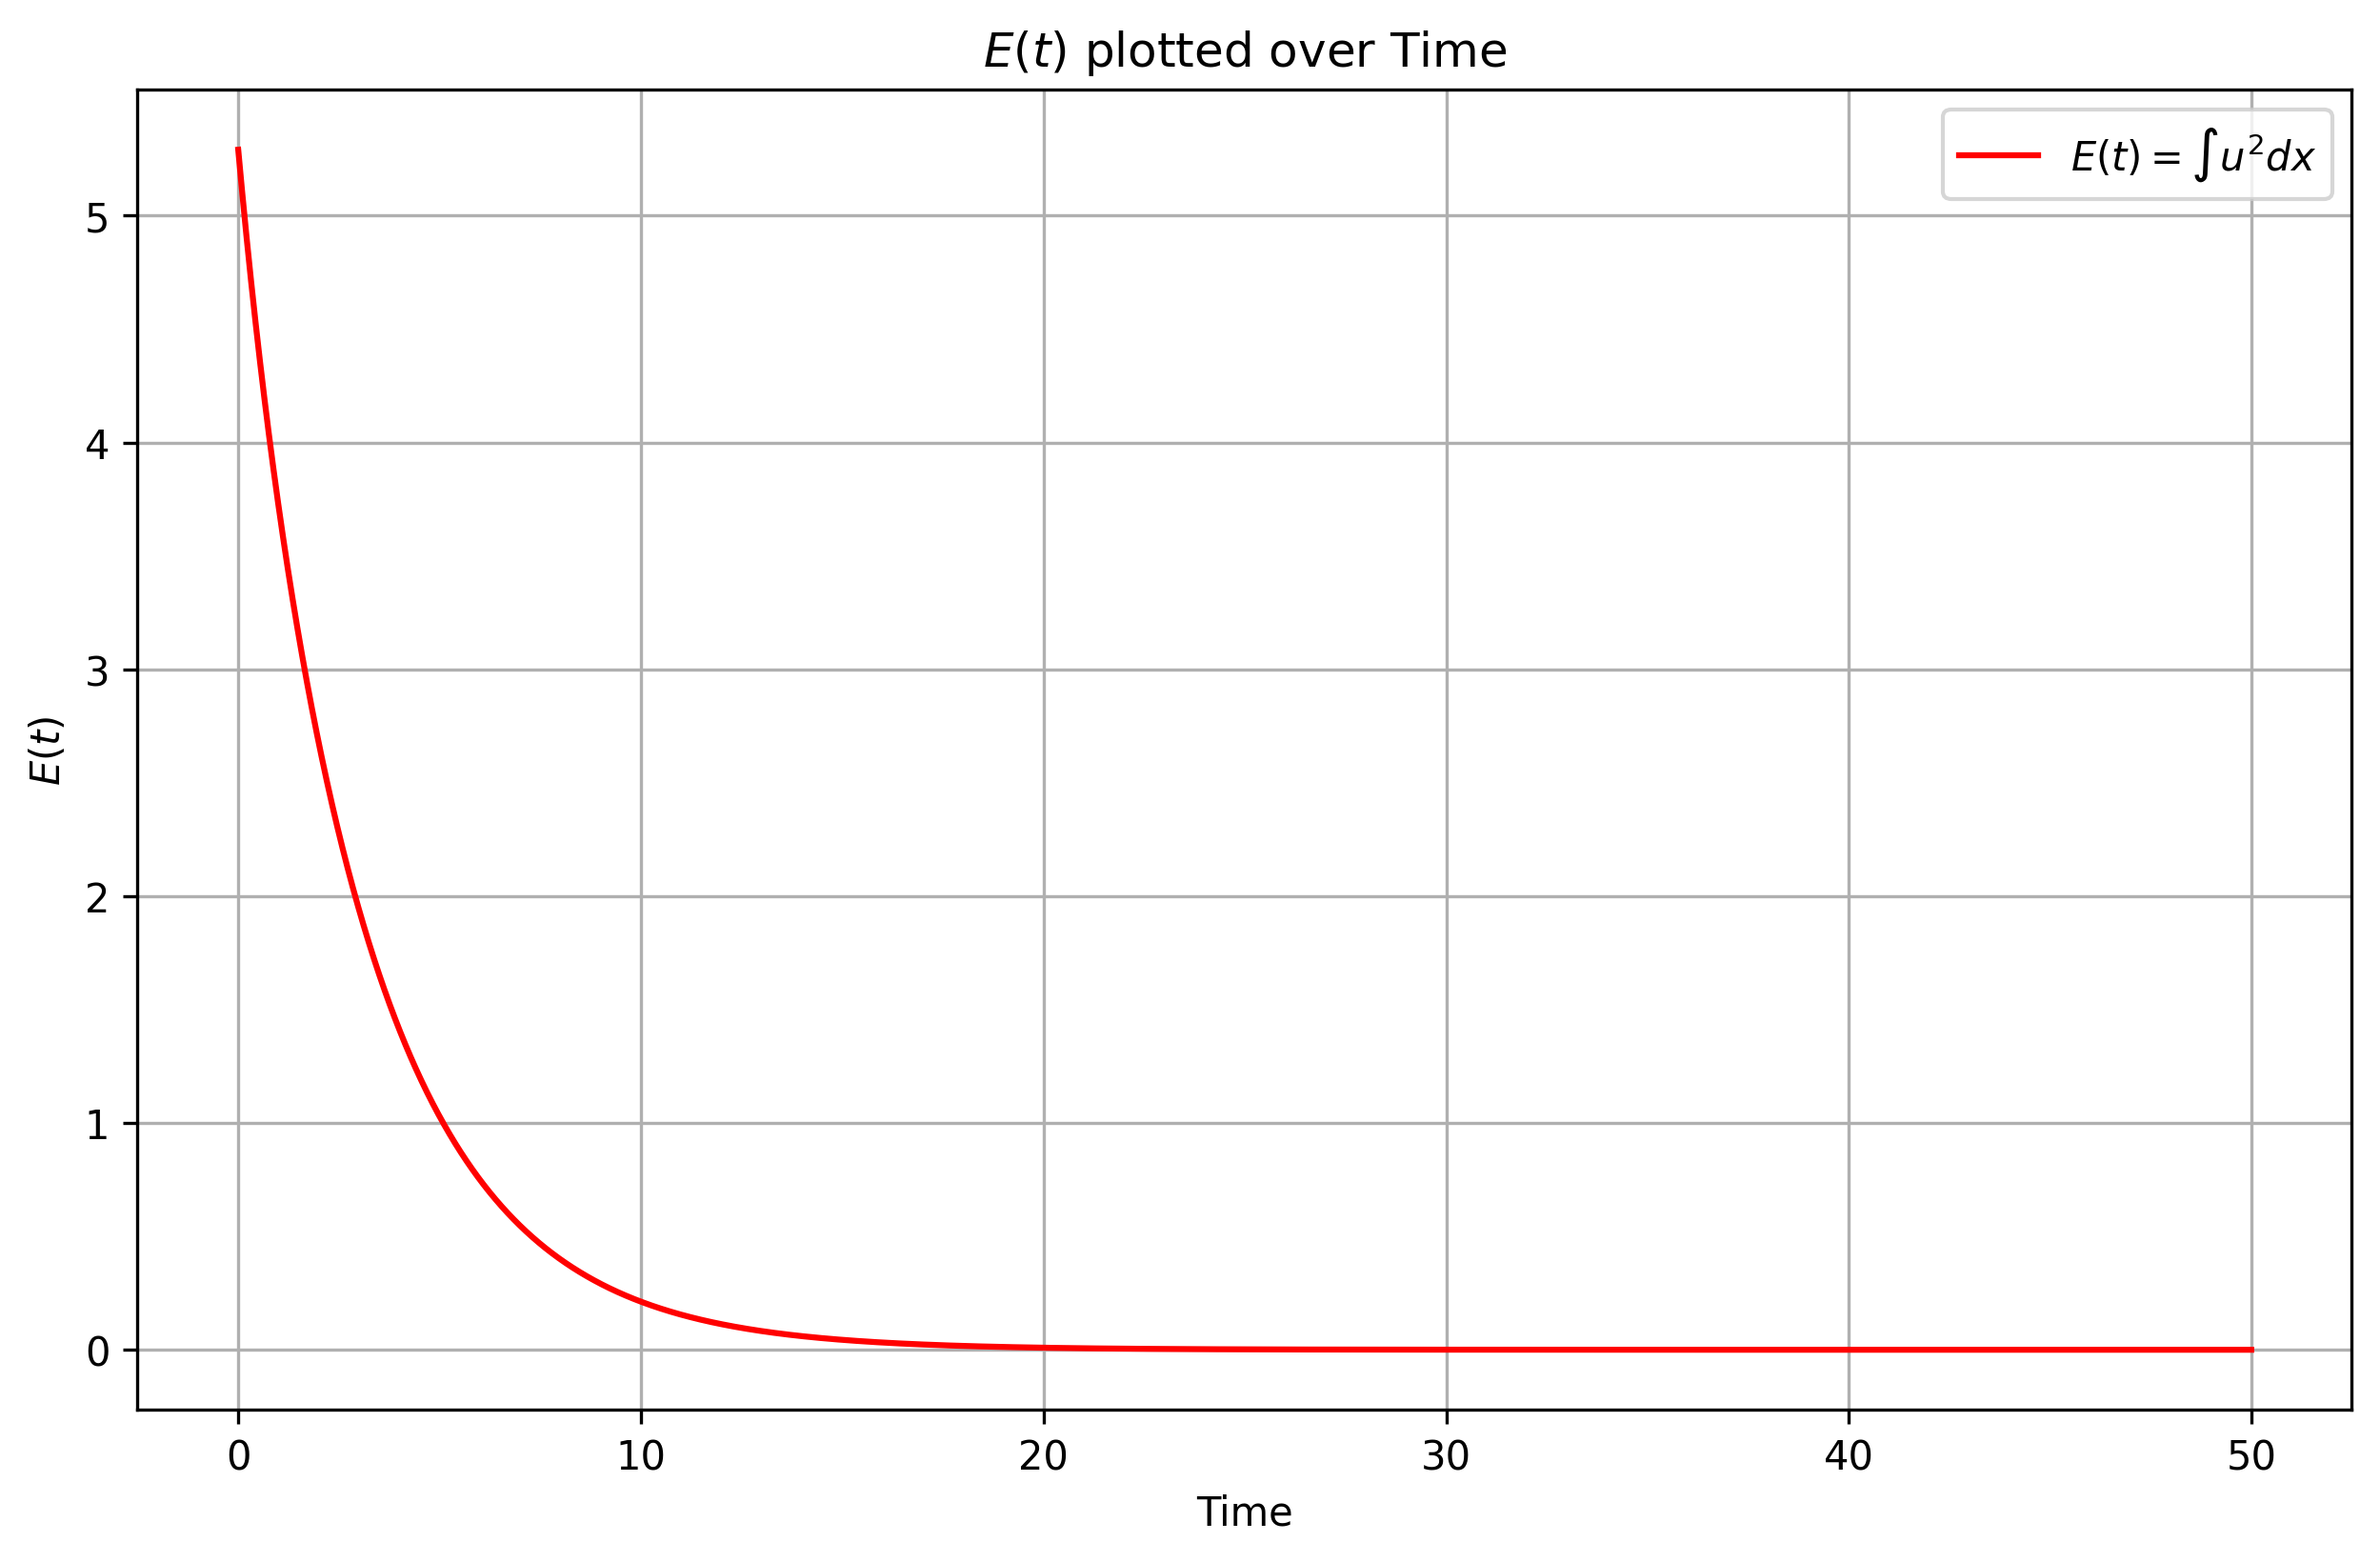

In [8]:
import numpy as np
import matplotlib.pyplot as plt
mp.rcParams['figure.dpi'] = 300

# Parameters
Lx = 10                 # Length of the spatial domain
Nx = 100                # Number of spatial points
dx = Lx / Nx            # Spatial step size
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)  # Periodic grid
nu = 0.1                # Diffusion coefficient
dt = 0.01               # Time step size
T = 50                  # Total simulation time
Nt = int(T / dt)        # Number of time steps

# Stability condition for explicit method
assert dt <= dx**2 / (2 * nu), "Time step too large for stability."

# Initial condition
u = np.sin(4 * np.pi * x / Lx) + 0.25 * np.sin(8 * np.pi * x / Lx)

# Storage for visualization
time_snapshots = [0, int(Nt / 4), int(Nt / 2), int(3 * Nt / 4), Nt - 1]  # Adjusted snapshots
solutions = []
integrals = []  # To store the integral of u^2
time_points = []  # To store corresponding time points

# Time stepping loop
for n in range(Nt):
    # Apply periodic boundary conditions using modular indexing
    u_next = np.zeros_like(u)
    for i in range(Nx):
        u_next[i] = u[i] + nu * dt / dx**2 * (
            u[(i+1) % Nx] - 2 * u[i] + u[(i-1) % Nx]
        )
    u = u_next
    
    # Compute the integral of u^2 over the domain
    integral = np.trapz(u**2, x)  # Or use np.sum(u**2) * dx
    integrals.append(integral)
    time_points.append(n * dt)
    
    # Save solution at specific time steps for visualization
    if n in time_snapshots:
        solutions.append(u.copy())

plt.figure(figsize=(10, 6))
plt.plot(time_points, integrals, label=r"$E(t)=\int u^2 dx$", color='r')
plt.xlabel("Time")
plt.ylabel(r"$E(t)$")
plt.title("$E(t)$ plotted over Time")
plt.grid()
plt.legend()
plt.show()
